Machine Learning CA1 - Abalone Dataset     Alicia Romero     Student ID: Sba25232

TASK 1: Cleaning and EDA phase

In [1]:
# Import Libraries and Load Data 
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb', 
# Machine Learning module, CCT College Dublin.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the abalone dataset
data = pd.read_csv('abalone.csv')

# Displaying the first 10 rows
print(data.head(10))

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   M   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   F   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3       

In [2]:
# Checking the shape
print(data.shape)


(4180, 9)


In [3]:
# Check for Missing Values and Duplicates 
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb'

print("Missing values:")
print(data.isnull().sum())


Missing values:
Sex               0
Length            0
Diameter          0
Height            8
Whole_weight      0
Shucked_weight    5
Viscera_weight    5
Shell_weight      0
Rings             0
dtype: int64


In [4]:
#I'll drop the null values and check
data = data.dropna()
print(data.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [5]:
#I'll check the duplicates now and drop them
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 3


In [6]:
data = data.drop_duplicates()
print(data.shape)

(4161, 9)


In [7]:
#and check again that it's been done
print(data.shape)


(4161, 9)


In [8]:
# Exploratory Data Analysis 
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb'

print(data.describe())

            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4161.000000  4161.000000  4161.000000   4161.000000     4161.000000   
mean      0.524166     0.407987     0.139561      0.829149        0.359599   
std       0.120046     0.099213     0.041834      0.489786        0.221785   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.442500        0.186500   
50%       0.545000     0.425000     0.140000      0.800500        0.336000   
75%       0.615000     0.480000     0.165000      1.154000        0.503000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4161.000000   4161.000000  4161.000000  
mean         0.180719      0.238941     9.931267  
std          0.109580      0.139051     3.223872  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [9]:
# Check Data Types
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb'
# Machine Learning module, CCT College Dublin.

print(data.dtypes)

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object


In [10]:
# Check Class Balance  or distribution for Sex (Target Variable) 
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb'

print(data['Sex'].value_counts())

Sex
M    1523
I    1338
F    1300
Name: count, dtype: int64


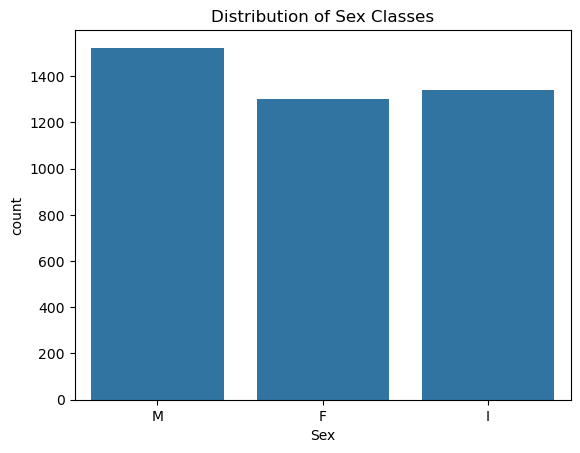

In [11]:
# Visualize Sex Distribution 
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb', Class2

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sex', data=data)
plt.title('Distribution of Sex Classes')
plt.show()

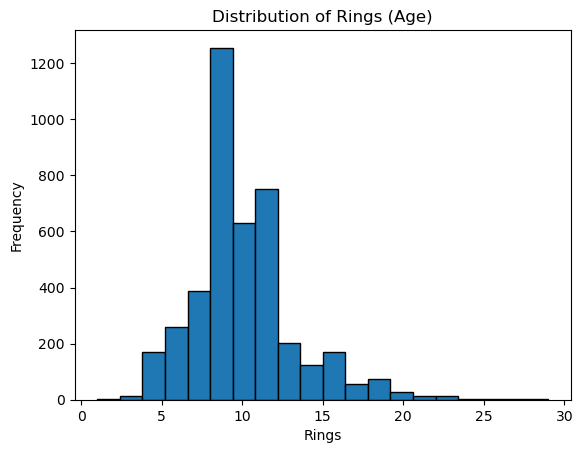

In [12]:
# Visualize Rings Distribution
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb', Class 2

plt.hist(data['Rings'], bins=20, edgecolor='black')
plt.title('Distribution of Rings (Age)')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

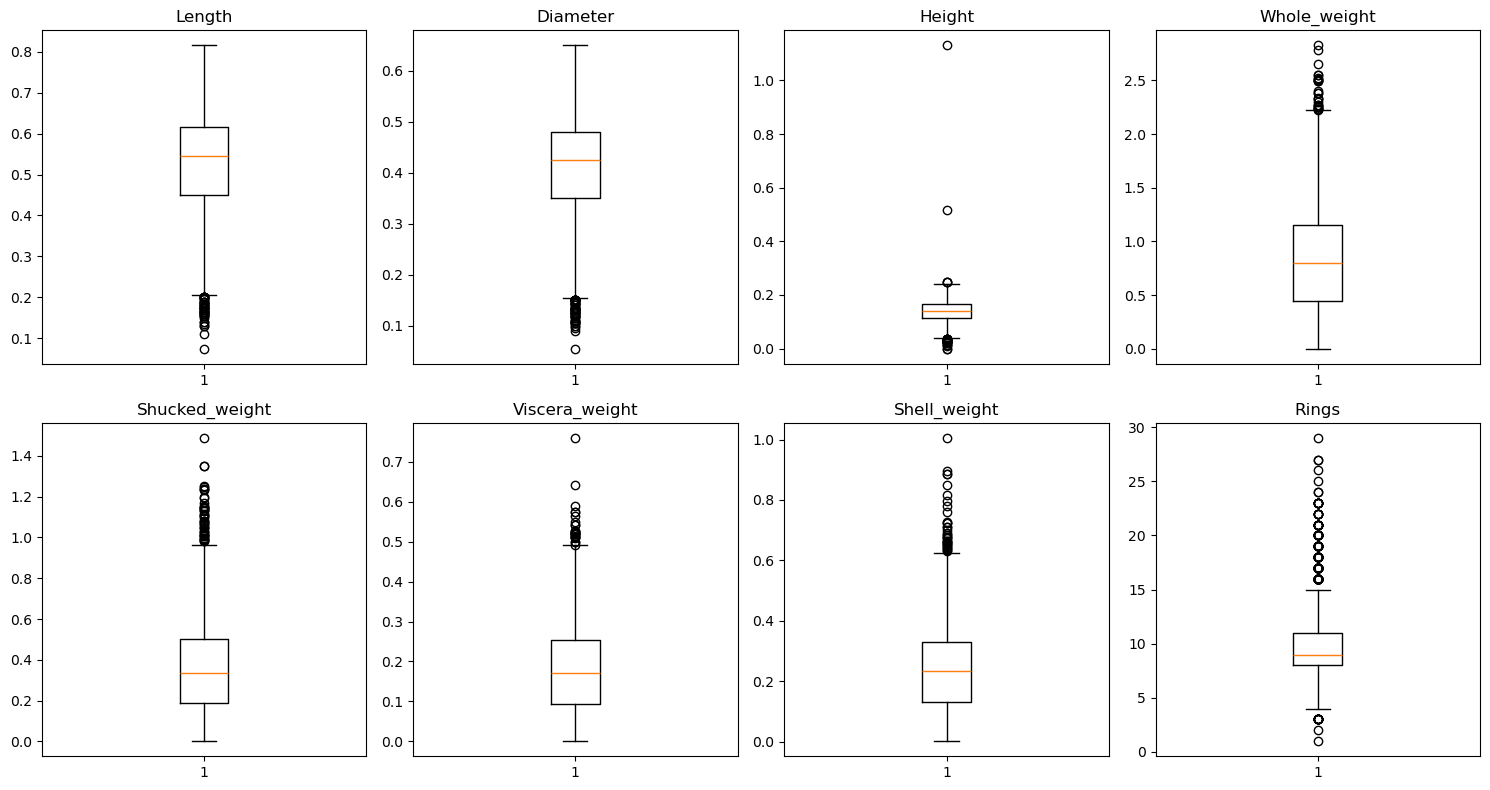

In [13]:
#I want to check for possible outliers and will do so by visualizing each variable with boxplots
#Code adapted from 'Data Preparation'(2025), CCT College Module 

plt.figure(figsize=(15, 8))

plt.subplot(2, 4, 1)
plt.boxplot(data['Length'])
plt.title('Length')

plt.subplot(2, 4, 2)
plt.boxplot(data['Diameter'])
plt.title('Diameter')

plt.subplot(2, 4, 3)
plt.boxplot(data['Height'])
plt.title('Height')

plt.subplot(2, 4, 4)
plt.boxplot(data['Whole_weight'])
plt.title('Whole_weight')

plt.subplot(2, 4, 5)
plt.boxplot(data['Shucked_weight'])
plt.title('Shucked_weight')

plt.subplot(2, 4, 6)
plt.boxplot(data['Viscera_weight'])
plt.title('Viscera_weight')

plt.subplot(2, 4, 7)
plt.boxplot(data['Shell_weight'])
plt.title('Shell_weight')

plt.subplot(2, 4, 8)
plt.boxplot(data['Rings'])
plt.title('Rings')

plt.tight_layout()
plt.savefig('outliers.png')
plt.show()

In [14]:
#And, as I see some outliers, I will proceed to remove the upper and lower extremes
#Code adapted from 'Data Preparation'(2025), CCT College Module 
# Cap at 1st and 99th percentile

lower = data['Length'].quantile(0.01)
data['Length'] = data['Length'].clip(lower, )

In [15]:
lower = data['Diameter'].quantile(0.01)
data['Diameter'] = data['Diameter'].clip(lower, )

In [16]:
lower = data['Height'].quantile(0.01)
upper = data['Height'].quantile(0.99)
data['Height'] = data['Height'].clip(lower, upper)

In [17]:

upper = data['Whole_weight'].quantile(0.99)
data['Whole_weight'] = data['Whole_weight'].clip(lower, upper)

In [18]:

upper = data['Shucked_weight'].quantile(0.99)
data['Shucked_weight'] = data['Shucked_weight'].clip(lower, upper)

In [19]:

upper = data['Viscera_weight'].quantile(0.99)
data['Viscera_weight'] = data['Viscera_weight'].clip(lower, upper)

In [20]:

upper = data['Shell_weight'].quantile(0.99)
data['Shell_weight'] = data['Shell_weight'].clip(lower, upper)

In [21]:
lower = data['Rings'].quantile(0.01)
upper = data['Rings'].quantile(0.99)
data['Rings'] = data['Rings'].clip(lower, upper)

In [22]:
# Save cleaned data
data.to_csv('abalone_clean.csv', index=False)

In [23]:
# Make sure the clean data is there
print (data.head(5))

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0450   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [24]:
print(data.describe())

            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4161.000000  4161.000000  4161.000000   4161.000000     4161.000000   
mean      0.524468     0.408199     0.139302      0.827464        0.359061   
std       0.119154     0.098604     0.037911      0.483547        0.215996   
min       0.195000     0.140000     0.045000      0.045000        0.045000   
25%       0.450000     0.350000     0.115000      0.442500        0.186500   
50%       0.545000     0.425000     0.140000      0.800500        0.336000   
75%       0.615000     0.480000     0.165000      1.154000        0.503000   
max       0.815000     0.650000     0.220000      2.141600        0.993700   

       Viscera_weight  Shell_weight        Rings  
count     4161.000000   4161.000000  4161.000000  
mean         0.182190      0.239283     9.913242  
std          0.105436      0.134412     3.126564  
min          0.045000      0.045000     4.000000  
25%          0.093500      0.130000     8.

In [25]:
# Save cleaned data for later use 
data.to_csv('abalone_clean.csv', index=False)
print('Cleaned data saved to abalone_clean.csv')

Cleaned data saved to abalone_clean.csv


TASK 2: Classification

In [26]:
# Load cleaned data
data = pd.read_csv('abalone_clean.csv')

In [27]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [28]:
# Encoding the 'Sex' column
#Code adapted from 'Data Preparation'(2025), CCT College Module

le = LabelEncoder()
data['Sex_Encoded'] = le.fit_transform(data['Sex'])

print('Sex encoding:')
print('F =', le.transform(['F'])[0])
print('I =', le.transform(['I'])[0])
print('M =', le.transform(['M'])[0])

Sex encoding:
F = 0
I = 1
M = 2


In [29]:
# Prepare features
# Code adapted from Iqbal, M. (2026) 'DT_Task_Solution.ipynb'
X = data.drop(['Sex','Sex_Encoded'], axis=1)
y = data['Sex_Encoded']

print('Features shape:', X.shape)
print('Target shape:', y.shape)

Features shape: (4161, 8)
Target shape: (4161,)


In [30]:
# Code adapted from Iqbal, M. (2026) 'DT_Task_Solution.ipynb'
from sklearn.model_selection import train_test_split

# Split the data: 70% training, 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

# Verify split sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (2912, 8)
Testing set size: (1249, 8)


Model 1: Decision Tree

In [31]:
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create model
dt_model = DecisionTreeClassifier(criterion='gini')
# Train model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_dt)

print('Training Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 0.9986263736263736
Test Accuracy: 0.4835868694955965


In [33]:
# Code adapted from Iqbal, M. (2026) 'Comparison_Classification_Models.ipynb'
# Import  and apply cross validation (k-fold)
from sklearn.model_selection import KFold, cross_val_score

# 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=5)
print('Mean Cross Validation accuracy:', cv_scores.mean())

Mean Cross Validation accuracy: 0.4907502424046542


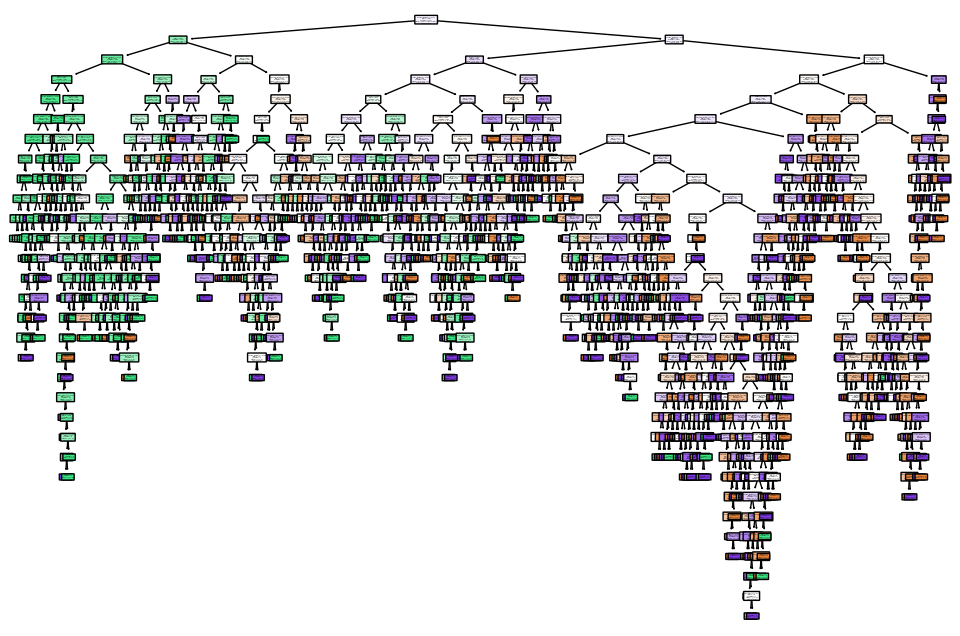

In [34]:
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
# Visualize tree
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model,filled=True,feature_names=X.columns,class_names=['Female', 'Infant', 'Male'], rounded=True)
plt.savefig('decision_tree.png')
plt.show()

That didn't really help

In [35]:
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[159  60 171]
 [ 47 261  94]
 [183  90 184]]


In [36]:
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
# Classification report
target_names = ['Female', 'Infant', 'Male']
report = classification_report(y_test, y_pred_dt,target_names=target_names)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

      Female       0.41      0.41      0.41       390
      Infant       0.64      0.65      0.64       402
        Male       0.41      0.40      0.41       457

    accuracy                           0.48      1249
   macro avg       0.48      0.49      0.49      1249
weighted avg       0.48      0.48      0.48      1249



Model 2: k-NN (nearest neighbours)

In [37]:
# Load cleaned data
data = pd.read_csv('abalone_clean.csv')

In [38]:
# Code adapted from Iqbal, M. (2026) 'Week_3_kNN.ipynb'
# Import kNN
from sklearn.neighbors import KNeighborsClassifier

# Find best k value by testing k from 1 to 20
k_values = range(1, 21)
test_acc = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_acc.append(accuracy_score(y_test, y_pred))
# Find the k with highest accuracy
best_k = k_values[test_acc.index(max(test_acc))]
print(f"Best k = {best_k}")
print(f"Test Accuracy with k={best_k}: {max(test_acc):.3f}")

Best k = 18
Test Accuracy with k=18: 0.543


In [39]:
# Train final model with best k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [40]:
# Calculate accuracies
train_acc_knn = accuracy_score(y_train, knn_model.predict(X_train))
test_acc_knn = accuracy_score(y_test, y_pred_knn)
print('\nkNN Final Results:')
print('Training Accuracy:', train_acc_knn)
print('Test Accuracy:', test_acc_knn)


kNN Final Results:
Training Accuracy: 0.6050824175824175
Test Accuracy: 0.5428342674139311


In [41]:
# Train model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [42]:
# Make predictions
y_pred_knn = knn_model.predict(X_test)

In [43]:
# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(cm_knn)

Confusion Matrix:
[[173  55 162]
 [ 36 311  55]
 [195  68 194]]


In [44]:
# Classification report
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
report_knn = classification_report(y_test, y_pred_knn)
print('Classification Report:')
print(report_knn)

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.44      0.44       390
           1       0.72      0.77      0.74       402
           2       0.47      0.42      0.45       457

    accuracy                           0.54      1249
   macro avg       0.54      0.55      0.54      1249
weighted avg       0.54      0.54      0.54      1249



In [45]:
# Code adapted from Iqbal, M. (2026) 'Comparison_Classification_Models.ipynb'
# Define classifiers for ML models
classifiers = {"k-Nearest Neighbors": KNeighborsClassifier(n_neighbors = 5),"Decision Tree": DecisionTreeClassifier(random_state = 42)}

In [46]:
# Code adapted from Iqbal, M. (2026) 'Comparison_Classification_Models.ipynb'
# Train and evaluate ML model classifiers for rice dataset
results = []
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Append results
    results.append([name, accuracy, precision, recall, f1_score])

In [47]:
# Code adapted from Iqbal, M. (2026) 'Comparison_Classification_Models.ipynb'
# Oerformance comparisson
# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("Model Performance Metrics on Test Set:")
print(results_df)

Model Performance Metrics on Test Set:
                 Model  Accuracy  Precision    Recall  F1 Score
0  k-Nearest Neighbors  0.519616   0.515753  0.519616  0.515209
1        Decision Tree  0.493995   0.491140  0.493995  0.492360


In [48]:
# Code adapted from Iqbal, M. (2026) 'Comparison_Classification_Models.ipynb'
# Comparisson of the mean accuracy depending on the method
# Cross-validation for accuracy on the full dataset
cv_results = []
for name, classifier in classifiers.items():
    cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
    cv_results.append([name, cv_scores.mean()])

# Display cross-validation results
cv_results_df = pd.DataFrame(cv_results, columns=["Model", "Mean CV Accuracy"])
print("\nCross-Validation Accuracy Scores:")
print(cv_results_df)


Cross-Validation Accuracy Scores:
                 Model  Mean CV Accuracy
0  k-Nearest Neighbors          0.522713
1        Decision Tree          0.490266


TASK 3: Regression

In [49]:
# Load cleaned data
data = pd.read_csv('abalone_clean.csv')

In [50]:
# Create dummy variables for Sex
sex_dummies = pd.get_dummies(data['Sex'], prefix='Sex')

In [51]:
# Combine with data
data_reg = pd.concat([data, sex_dummies], axis=1)

In [52]:
# Code adapted from Iqbal, M. (2026) 'CASE_STUDY_-_RF_Cross-validation.ipynb'
# Calculate correlation matrix
correlation_matrix = data_reg[['Length', 'Diameter', 'Height','Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight','Sex_F', 'Sex_I', 'Sex_M', 'Rings']].corr()

print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
                  Length  Diameter    Height  Whole_weight  Shucked_weight  \
Length          1.000000  0.986781  0.901496      0.931291        0.903748   
Diameter        0.986781  1.000000  0.907555      0.930766        0.898507   
Height          0.901496  0.907555  1.000000      0.893953        0.842700   
Whole_weight    0.931291  0.930766  0.893953      1.000000        0.970249   
Shucked_weight  0.903748  0.898507  0.842700      0.970249        1.000000   
Viscera_weight  0.892758  0.889164  0.859876      0.964925        0.932674   
Shell_weight    0.900369  0.907962  0.892840      0.959435        0.891856   
Sex_F           0.310912  0.319774  0.319646      0.304336        0.270104   
Sex_I          -0.552470 -0.564914 -0.560612     -0.562059       -0.527695   
Sex_M           0.236535  0.240074  0.236026      0.252160        0.251776   
Rings           0.562916  0.580888  0.614995      0.548379        0.428808   

                Viscera_weight  Shell_weigh

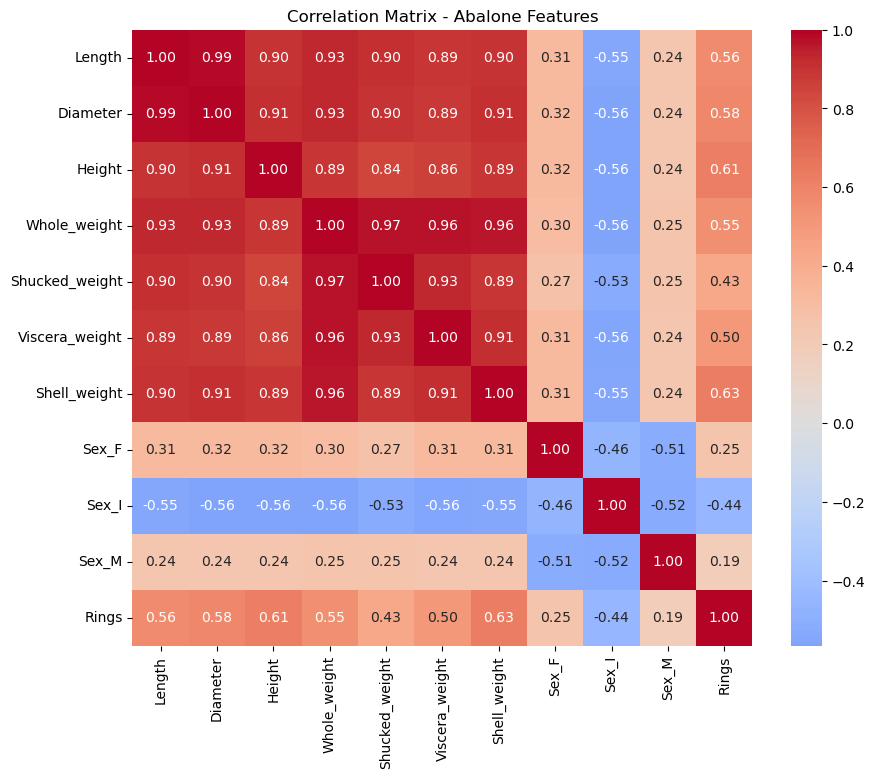

In [53]:
# Code adapted from Iqbal, M. (2026) 'CASE_STUDY_-_RF_Cross-validation.ipynb'
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap
plt.figure(figsize=(10, 8))                              # Create figure with specified size
sns.heatmap(
    correlation_matrix,                                  # Correlation matrix values
    annot=True,                                         # Display numbers inside cells
    cmap='coolwarm',                                    # Color theme
    fmt='.2f',                                          # Format numbers to 2 decimals
    center=0                                            # Center colormap at 0
)
plt.title('Correlation Matrix - Abalone Features')       # Add title
plt.show()   

In [54]:
# Prepare features
X = data_reg[['Length', 'Diameter', 'Height',
              'Whole_weight', 'Shucked_weight',
              'Viscera_weight', 'Shell_weight',
              'Sex_F', 'Sex_I', 'Sex_M']]
y = data_reg['Rings']

print('Features shape:', X.shape)
print('Target shape:', y.shape)

Features shape: (4161, 10)
Target shape: (4161,)


In [55]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print('Training set:', X_train.shape)
print('Test set:', X_test.shape)

Training set: (2912, 10)
Test set: (1249, 10)


In [56]:
# Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Features scaled')

Features scaled


Model 1 Linear Regression

In [57]:
# Code adapted from Iqbal, M. (2026) 'Classwork_Week 4.ipynb'
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [58]:
# Create model
lr_model = LinearRegression()

In [59]:
# Train Linear Regression model
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [60]:
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

In [61]:
# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Linear Regression Results:')
print(f'MSE: {mse_lr:.3f}')
print(f'R²: {r2_lr:.3f}')
print(f'MAE: {mae_lr:.3f}')

Linear Regression Results:
MSE: 4.811
R²: 0.528
MAE: 1.580


Model 2: Ridge Regression (L2 Regularization)

In [62]:
# Code adapted from Iqbal, M. (2026) 'Linear-Rdige-Lasso.ipynb'
from sklearn.linear_model import Ridge

# Create Ridge model with alpha=10 (regularization strength)
ridge_model = Ridge(alpha=10.0)

In [63]:
# Train Ridge model
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10.0)

In [64]:
# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [65]:
# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print('Ridge Regression Results:')
print(f'MSE: {mse_ridge:.3f}')
print(f'R²: {r2_ridge:.3f}')
print(f'MAE: {mae_ridge:.3f}')

Ridge Regression Results:
MSE: 4.764
R²: 0.533
MAE: 1.575


Model 3: Lasso Regression (L1 Regularization)

In [66]:
# Code adapted from Iqbal, M. (2026) 'Linear-Rdige-Lasso.ipynb'
from sklearn.linear_model import Lasso

# Create Lasso model with alpha=0.1 (regularization strength)
lasso_model = Lasso(alpha=0.1)

In [67]:
# Train Lasso model
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [68]:
# Make predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [73]:
# Code adapted from Iqbal, M. (2026) 'Rdige-Lasso - Practice_Solution.ipynb'
# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print('Lasso Regression Results:')
print(f'MSE: {mse_lasso:.3f}')
print(f'R²: {r2_lasso:.3f}')
print(f'MAE: {mae_lasso:.3f}')

Lasso Regression Results:
MSE: 4.907
R²: 0.519
MAE: 1.606


Model Comparison

In [74]:
# Code adapted from Iqbal, M. (2026) 'Rdige-Lasso - Practice_Solution.ipynb'
# Create comparison table
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge (L2)', 'Lasso (L1)'],
    'MSE': [mse_lr, mse_ridge, mse_lasso],
    'R²': [r2_lr, r2_ridge, r2_lasso],
    'MAE': [mae_lr, mae_ridge, mae_lasso]
})

print('\nModel Performance Comparison:')
print(comparison.to_string(index=False))


Model Performance Comparison:
            Model      MSE       R²      MAE
Linear Regression 4.810561 0.528342 1.579758
       Ridge (L2) 4.763637 0.532943 1.574542
       Lasso (L1) 4.907384 0.518849 1.605774


In [75]:
# Code adapted from Iqbal, M. (2026) 'Rdige-Lasso - Practice_Solution.ipynb'
# Compare coefficients across models
feature_names = ['Length', 'Diameter', 'Height', 'Whole_weight',
                 'Shucked_weight', 'Viscera_weight', 'Shell_weight',
                 'Sex_F', 'Sex_I', 'Sex_M']

coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Linear': lr_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_
})

print('\nCoefficient Comparison:')
print(coef_comparison.to_string(index=False))


Coefficient Comparison:
       Feature    Linear     Ridge     Lasso
        Length -0.076447  0.018839  0.000000
      Diameter  0.830229  0.778421  0.364623
        Height  0.839033  0.873086  0.879434
  Whole_weight  4.853859  3.224135  0.000000
Shucked_weight -4.632105 -3.842000 -1.579877
Viscera_weight -1.433760 -1.102015 -0.000000
  Shell_weight  1.069978  1.542641  1.937414
         Sex_F  0.135717  0.141607  0.000000
         Sex_I -0.269364 -0.276269 -0.333574
         Sex_M  0.129667  0.130666  0.000000


That give us the most information in what features can give us better indications for age

<Figure size 1200x600 with 0 Axes>

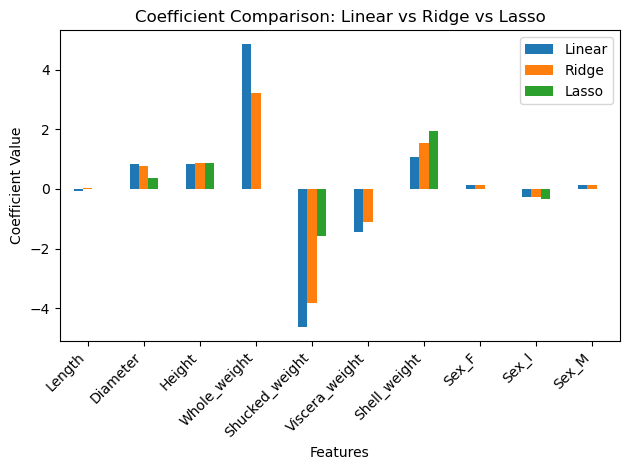

In [76]:
# Code adapted from Iqbal, M. (2026) 'Rdige-Lasso - Practice_Solution.ipynb'
# Plot coefficient comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
coef_comparison.set_index('Feature')[['Linear', 'Ridge', 'Lasso']].plot(kind='bar')
plt.title('Coefficient Comparison: Linear vs Ridge vs Lasso')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()